# Data exploration of smoking.csv dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train = pd.read_csv("data/train_data.csv")
train.head(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,alt,gtp,dental_caries,tartar,smoking,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,53.0,61.0,1,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,47.0,44.0,0,1,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,57.0,36.0,0,1,0,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,52.0,61.0,0,1,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,16.0,31.0,0,1,1,24.69,0.0,2.1,1,0


hdl                   -0.179716
age                   -0.158847
vision                -0.073636
ldl                   -0.045241
cholesterol           -0.027766
hearing_impairment    -0.022088
hearing(left)         -0.021213
hearing(right)        -0.018393
urine_protein          0.015249
ast                    0.059557
healthy_weight         0.069673
systolic               0.073736
eyesight(left)         0.088285
alt                    0.092480
tartar                 0.095967
eyesight(right)        0.098459
fasting_blood_sugar    0.100949
eyesight_total         0.101586
dental_caries          0.103338
bmi                    0.108064
relaxation             0.108124
serum_creatinine       0.220852
waist(cm)              0.225643
gtp                    0.240740
triglyceride           0.253933
weight(kg)             0.303082
height(cm)             0.395006
hemoglobin             0.401821
gender                 0.510643
smoking                1.000000
Name: smoking, dtype: float64

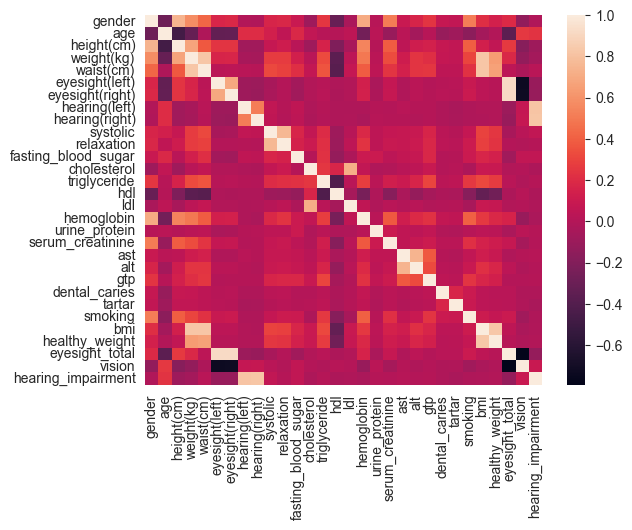

In [26]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
display(corr["smoking"].sort_values())

In [24]:
def bar_chart(train_data, feature):
    smoking = train_data[train_data['smoking']==1][feature].value_counts()
    not_smoking = train_data[train_data['smoking']==0][feature].value_counts()
    df = pd.DataFrame([smoking, not_smoking])
    df.index = ['Smoking', 'Not Smoking']
    print(f"Smoking: {smoking} \nNot smoking: {not_smoking}")
    df.plot(kind='bar', stacked=True, figsize=(10, 5),rot=0)

### In our data, we have about 1.74 times more men than women

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)   
2           0   45         150          60       81.2             0.6  \
10          0   40         155          45       59.0             0.5   
14          0   60         160          55       80.0             1.0   
16          0   50         155          55       74.0             1.0   
19          0   40         160          55       70.0             1.0   
...       ...  ...         ...         ...        ...             ...   
44539       0   45         150          55       80.0             1.0   
44542       0   60         150          65       91.5             0.8   
44548       0   40         170          75       84.0             0.1   
44550       0   60         150          50       77.0             0.9   
44552       0   60         145          50       75.8             0.3   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   alt   
2                  0.5            1.0        

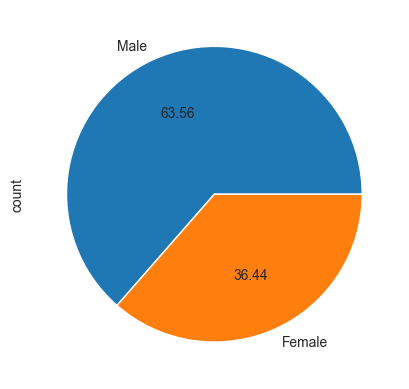

In [11]:
train["gender"].value_counts().plot(kind="pie", labels=["Male", "Female"], autopct='%.2f')
print(train[train["gender"]== 0])

Smoking: gender
1    15687
0      689
Name: count, dtype: int64 
Not smoking: gender
0    15548
1    12629
Name: count, dtype: int64


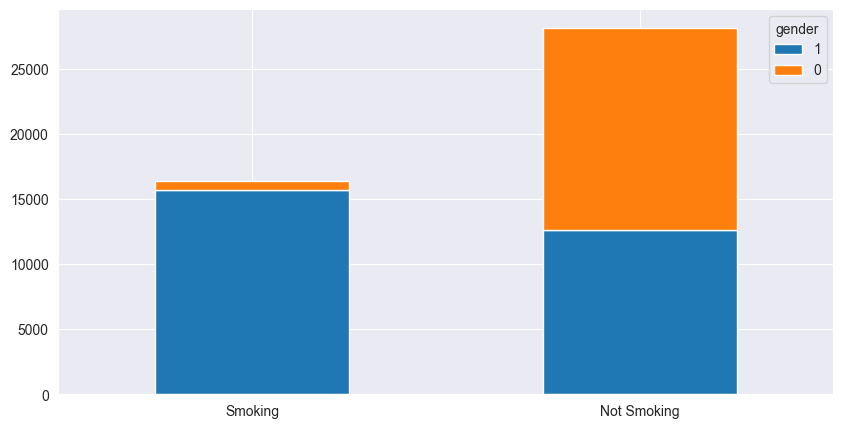

In [25]:
bar_chart(train, "gender")

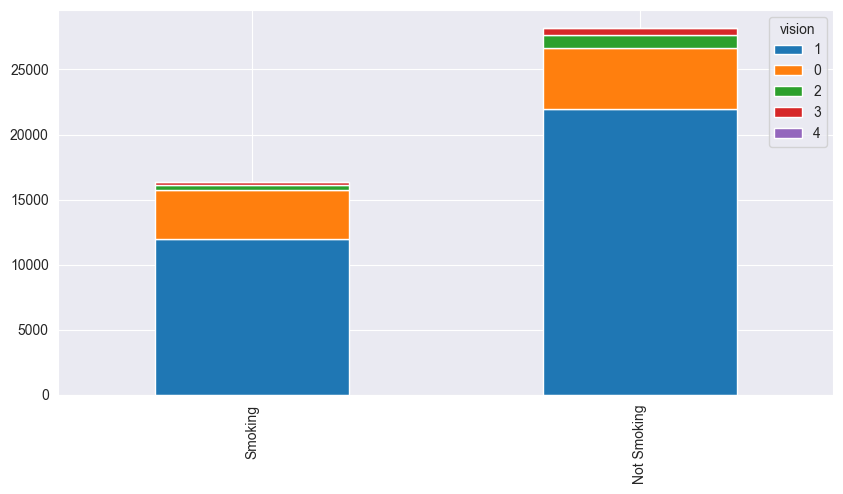

In [10]:
bar_chart(train, "vision")

### Choosing two variables with the highest correlation with target variable:

<Axes: xlabel='weight(kg)', ylabel='hemoglobin'>

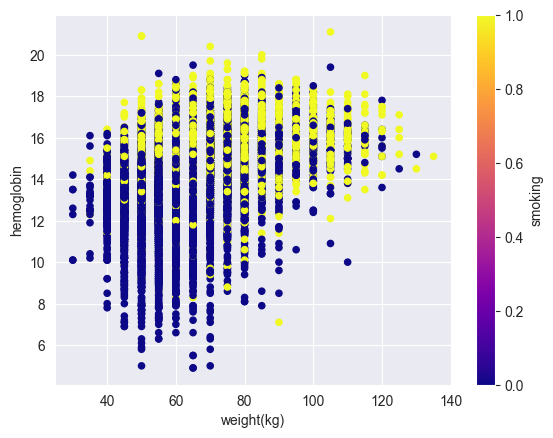

In [11]:
train.plot.scatter(x = 'weight(kg)',
                   y = 'hemoglobin',
                   c = 'smoking',
                   colormap = 'plasma')